In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
x = np.load('train_images.npy')
y = np.loadtxt('train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load('test_images.npy')

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [5]:
x_valid_norm = (x_valid - np.mean(x_valid, axis=0, dtype=np.float64))/np.std(x_valid, axis=0, dtype=np.float64)

In [6]:
x_train_norm = (x_train - np.mean(x_train, axis=0, dtype=np.float64))/np.std(x_train, axis=0, dtype=np.float64)

In [18]:
x_test_norm = (x_test - np.mean(x_test, axis=0, dtype=np.float64))/np.std(x_test, axis=0, dtype=np.float64)

In [7]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

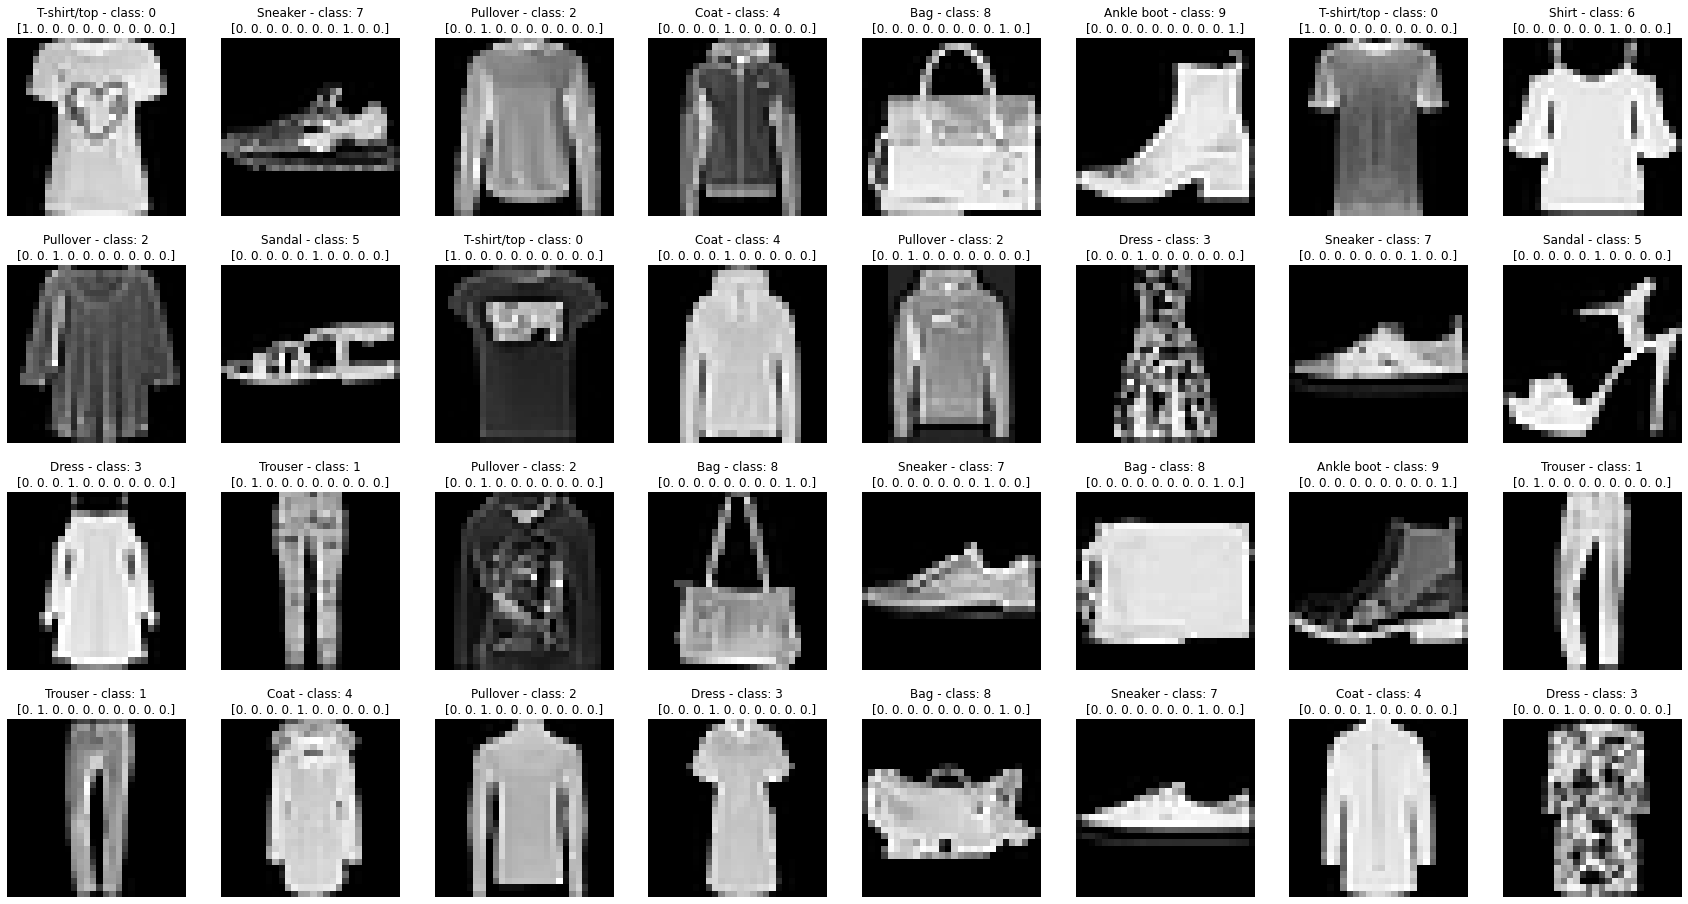

In [8]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [8]:
output_size = 10
hidden_units = 100
model_multi_layer = Sequential()
model_multi_layer.add(Flatten(input_shape=x_train_norm.shape[1:]))
model_multi_layer.add(Dense(hidden_units, activation='relu', kernel_initializer='normal', name='middle'))
model_multi_layer.add(Dense(output_size, name='Salida'))
model_multi_layer.add(Activation('softmax'))
model_multi_layer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
middle (Dense)               (None, 100)               78500     
_________________________________________________________________
Salida (Dense)               (None, 10)                1010      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
lr = 0.00004 
Adam = optimizers.Adam(lr=lr)
model_multi_layer.compile(loss = 'categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

In [10]:
batch_size = 64
model_multi_layer.fit(x_train_norm, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid_norm, y_val_categorical)
                      )

Epoch 1/20
844/844 [==============================] - 1s 2ms/step - loss: 0.9442 - accuracy: 0.6835 - val_loss: 0.5950 - val_accuracy: 0.7978
Epoch 2/20
844/844 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.8127 - val_loss: 0.4959 - val_accuracy: 0.8303
Epoch 3/20
844/844 [==============================] - 1s 1ms/step - loss: 0.4653 - accuracy: 0.8363 - val_loss: 0.4557 - val_accuracy: 0.8432
Epoch 4/20
844/844 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8492 - val_loss: 0.4337 - val_accuracy: 0.8503
Epoch 5/20
844/844 [==============================] - 1s 1ms/step - loss: 0.4060 - accuracy: 0.8574 - val_loss: 0.4174 - val_accuracy: 0.8537
Epoch 6/20
844/844 [==============================] - 1s 1ms/step - loss: 0.3881 - accuracy: 0.8632 - val_loss: 0.4054 - val_accuracy: 0.8592
Epoch 7/20
844/844 [==============================] - 1s 1ms/step - loss: 0.3740 - accuracy: 0.8682 - val_loss: 0.3953 - val_accuracy: 0.8617
Epoch 

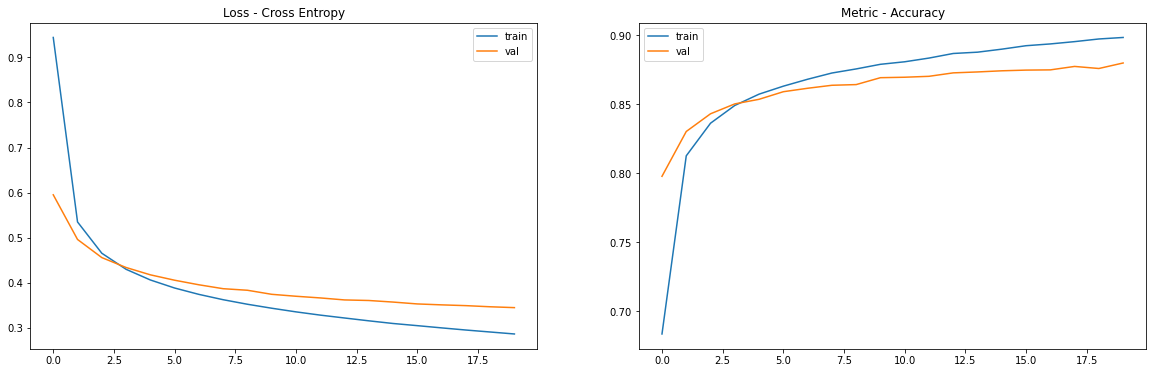

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_multi_layer.history.history['loss'], label='train')
ax1.plot(model_multi_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_multi_layer.history.history['accuracy'], label='train')
ax2.plot(model_multi_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [19]:
loss, acc = model_multi_layer.evaluate(x_valid_norm, y_val_categorical, verbose=0)
print(acc, loss)

0.8799999952316284 0.34459349513053894


In [20]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_multi_layer.predict(x_test_norm)
print(test_prediction.shape)

(10000, 10)


In [21]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 3 7]


# Armo CSV para submitear

In [22]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')